hi hello
This model was trained with sparsemax
image_idxs <type 'numpy.ndarray'> (482,) int32
file_names <type 'numpy.ndarray'> (100,) <U57
features <type 'numpy.ndarray'> (100, 196, 512) float32
captions <type 'numpy.ndarray'> (482, 17) int32
Elapse time: 0.05
INFO:tensorflow:Restoring parameters from model/lstm/model-16
Sampled Caption: a woman and a woman are smiling for a picture .


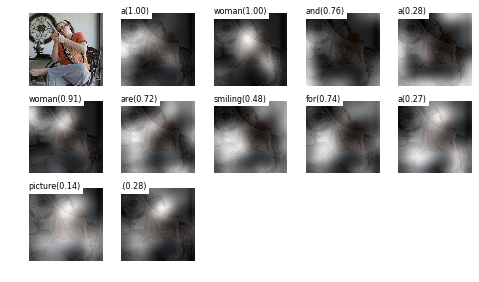

Sampled Caption: a tall building with a clock on the top .


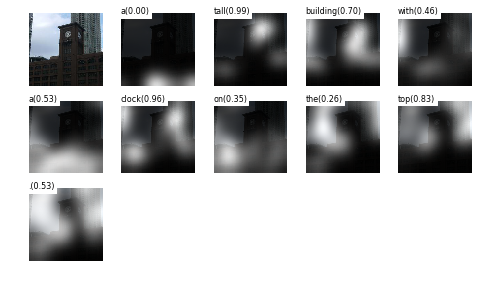

Sampled Caption: three zebras standing around in a zoo cage .


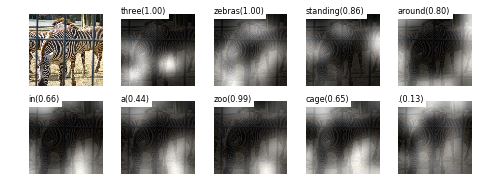

Sampled Caption: a woman is putting her mobile food on a piece of paper .


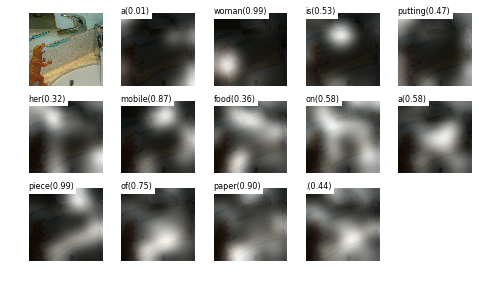

Sampled Caption: a woman and a woman are smiling for a picture .


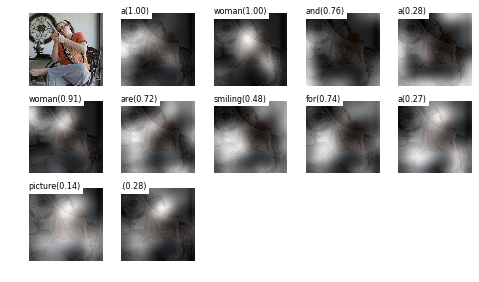

Sampled Caption: a zebra standing in the grass next to a tree .


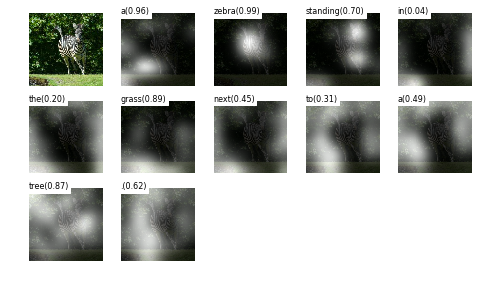

Sampled Caption: a red double decker bus is driving down the street .


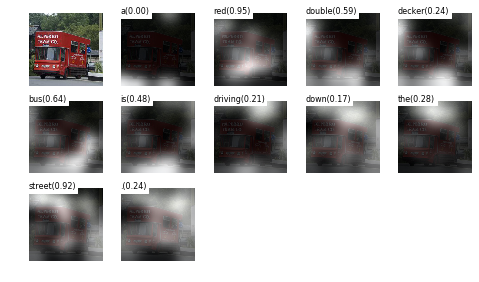

Sampled Caption: a man is on a boat in the water .


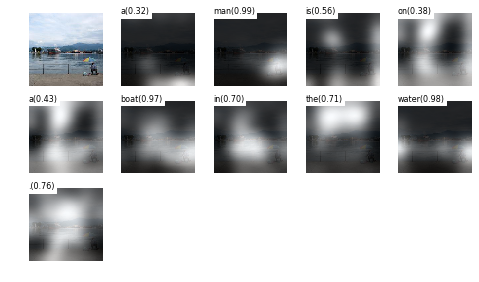

Sampled Caption: a young boy holding a bat in a game .


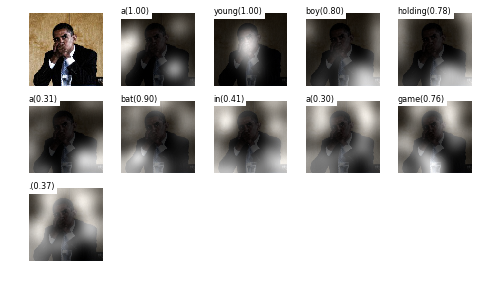

Sampled Caption: a tall building with a clock on the top .


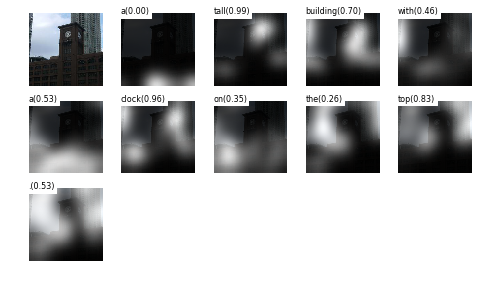

Saved ./data/val/val.candidate.captions.pkl..


In [1]:
import matplotlib.pyplot as plt
import cPickle as pickle
import tensorflow as tf
from core.solver import CaptioningSolver
from core.model import CaptionGenerator
from core.utils import load_coco_data
from core.bleu import evaluate

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2
def main():
    data = load_coco_data(data_path='./data', split='val')
    with open('./data/train/word_to_idx.pkl', 'rb') as f:
        word_to_idx = pickle.load(f)
        model = CaptionGenerator(word_to_idx, dim_feature=[196, 512], dim_embed=512,
                                 dim_hidden=1024, n_time_step=16, prev2out=True,
                                 ctx2out=True, alpha_c=1.0, selector=True, dropout=True)
        solver = CaptioningSolver(model, data, data, n_epochs=20, batch_size=128, update_rule='adam',
                                  learning_rate=0.001, print_every=1000, save_every=1, image_path='./image/val2014_resized',
                                  pretrained_model=None, model_path='model/lstmval/', test_model='model/lstm/model-16',
                                  print_bleu=True, log_path='log/')

        solver.test(data, split='val')
if __name__ == "__main__":
    print('This model was trained with sparsemax')
    main()



## Compare against reference captions

In [2]:
from PIL import Image
import numpy as np

In [3]:
# load the caption files

with open('./data/val/val.candidate.captions.pkl') as cand_pkl:
    candidates = pickle.load(cand_pkl)
with open('./data/val/val.references.pkl') as ref_pkl:
    references = pickle.load(ref_pkl)

In [4]:
# this dictionary contains file names and image indices
data = load_coco_data(data_path='./data', split='val')

image_idxs <type 'numpy.ndarray'> (482,) int32
file_names <type 'numpy.ndarray'> (100,) <U57
features <type 'numpy.ndarray'> (100, 196, 512) float32
captions <type 'numpy.ndarray'> (482, 17) int32
Elapse time: 0.04


In [5]:
# this displays a single image and its caption
def display_image(filename):
    im = Image.open(filename)
    plt.figure()
    plt.imshow(np.asarray(im))

The caption generated by our model is: a bowl of soup and a cup of coffee .


[u'toilet with indefinite end because of bright light .',
 u'a toilet that has a big deep hole in it .',
 u'a toilet seat over a hole in a bath room .',
 u'a toilet seat sits on top of a hole in the ground .',
 u'a toilet lid on a hole in a floor leading to the outside .']

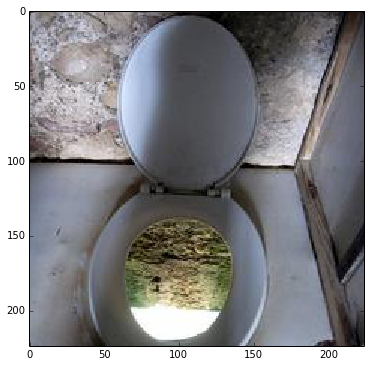

In [6]:
i=44
filename = str(data['file_names'][i])
display_image(filename)
print('The caption generated by our model is: '+str(candidates[i]))
references[i]